In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Plotting
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_context('talk')

# Import user_profile as a library
# some_file.py
import sys
sys.path.insert(0, '/home/trangel/user-profile-tonatiuh-latest/stats-core')
import vehicle 
import battery 
import vehicle_stats

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [6]:
header = pd.read_csv('../data/aglog_header.csv',index_col=0)
zero = 0.000001 #1e-6 

# This has a jump on odometer
#infile = '../data/vin_LMGGN1S50G1002215.csv' 
#SDATE = '2016-08-31'

#infile = '../data/vin_LMGGN1S5XF1001104.csv'
#infile = '../data/vin_LMGGN1S50E1000168.csv'
#infile = '../data/vin_LMGGN1S50G1002649.csv'

# AG1 with SOH problem on battery
#infile = '../data/tmp22.csv'

#AG2
infile = '../data/tmp-LMGGN1S58G1003838-20171224.csv'
infile2 = '../data/tmp-LMGGN1S58G1003838-20171223.csv'

#AG2
#infile = '../data/tmp-LMGGN1S53G1003178-20170831.csv'
#infile2 = '../data/tmp-LMGGN1S53G1003178-20170901.csv'



SDATE = '2017-12-23'
EDATE = '2017-12-24'

df = pd.read_csv(infile,header=None)
del df[85] #skip last column
df.columns = header.Column.values
print(len(df))


df2 = pd.read_csv(infile2,header=None)
del df2[85] #skip last column
df2.columns = header.Column.values
print(len(df2))

df = df.append(df2)
print(len(df))
df.head()

2028
4115
6143


,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
0,LMGGN1S58G1003838,1514085561000,20171224,4.0,0.5,349.0,0.0,1000.0,3.97,3.96,...,39.133583,117.287001,39.134596,0.0,0.0,13.0,0.0,1.0,0.0,0.0
1,LMGGN1S58G1003838,1514085551000,20171224,4.0,0.5,349.0,0.0,1000.0,3.97,3.96,...,39.133591,117.287001,39.134604,0.0,0.0,13.0,0.0,1.0,0.0,0.0
2,LMGGN1S58G1003838,1514085541000,20171224,4.0,3.5,348.0,0.0,1000.0,3.96,3.95,...,39.133583,117.287018,39.134596,0.0,0.0,13.0,0.0,1.0,0.0,132.0
3,LMGGN1S58G1003838,1514084467000,20171224,4.0,2.0,347.0,0.0,1022.0,3.95,3.94,...,39.133780,117.286887,39.134793,0.0,0.0,13.0,0.0,1.0,0.0,0.0
4,LMGGN1S58G1003838,1514084457000,20171224,4.0,4.0,346.0,0.0,1022.0,3.93,3.92,...,39.133713,117.286923,39.134726,0.0,0.0,14.0,0.0,1.0,0.0,154.0


In [7]:
df['SDATE'] = pd.to_datetime(df['SDATE'].astype(str),
                             utc=True).dt.tz_convert('Asia/Hong_Kong').dt.date


df.index = pd.to_datetime(df['TDATE'], unit='ms',
                             utc=True).dt.tz_convert('Asia/Hong_Kong')

<a = 'analysis'></a>    
# Stats on few days

In [8]:
# Select distinct values of Sdate
#SDATES = df.SDATE.unique()
# Take first date
#SDATE = SDATES[0]


SDATE = pd.to_datetime(SDATE).date()
EDATE = pd.to_datetime(EDATE).date()


filter1 = df.SDATE >= SDATE
filter2 = df.SDATE <= EDATE

df1 = df[ filter1 & filter2 ]
#df1 = df[filter2]
df1.head()

,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
TDATE,,,,,,,,,,,,,,,,,,,,,
2017-12-24 11:19:21+08:00,LMGGN1S58G1003838,1514085561000,2017-12-24,4.0,0.5,349.0,0.0,1000.0,3.97,3.96,...,39.133583,117.287001,39.134596,0.0,0.0,13.0,0.0,1.0,0.0,0.0
2017-12-24 11:19:11+08:00,LMGGN1S58G1003838,1514085551000,2017-12-24,4.0,0.5,349.0,0.0,1000.0,3.97,3.96,...,39.133591,117.287001,39.134604,0.0,0.0,13.0,0.0,1.0,0.0,0.0
2017-12-24 11:19:01+08:00,LMGGN1S58G1003838,1514085541000,2017-12-24,4.0,3.5,348.0,0.0,1000.0,3.96,3.95,...,39.133583,117.287018,39.134596,0.0,0.0,13.0,0.0,1.0,0.0,132.0
2017-12-24 11:01:07+08:00,LMGGN1S58G1003838,1514084467000,2017-12-24,4.0,2.0,347.0,0.0,1022.0,3.95,3.94,...,39.133780,117.286887,39.134793,0.0,0.0,13.0,0.0,1.0,0.0,0.0
2017-12-24 11:00:57+08:00,LMGGN1S58G1003838,1514084457000,2017-12-24,4.0,4.0,346.0,0.0,1022.0,3.93,3.92,...,39.133713,117.286923,39.134726,0.0,0.0,14.0,0.0,1.0,0.0,154.0


# Use vehicle class

In [9]:
from importlib import reload
reload(vehicle)

veh = vehicle.Vehicle(data_file = df1, header_file = list(df1.columns.values), do_sort=False)
veh.add_cellvoltdiff()
veh.set_charging_driving_dfs()
Nc = len(veh.df_charge)
Nd = len(veh.df_drive)
Ndb = len(veh.df_drive_on_batt)
print('Nc {}'.format(Nc))
print('Nd {}'.format(Nd))
print('Ndb {}'.format(Ndb))

Nc 2136
Nd 1473
Ndb 790


# Visualize charging and driving periods

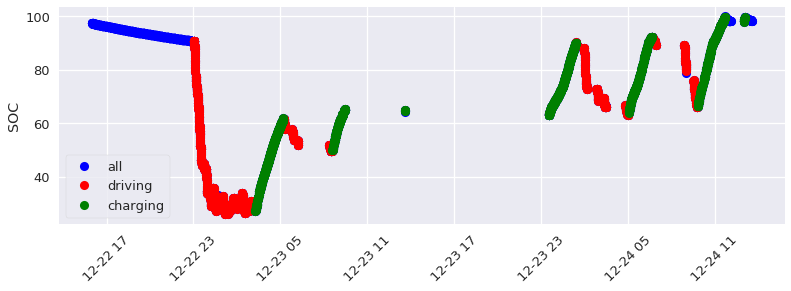

In [10]:
sns.set(rc={"figure.figsize": (13, 4)})
sns.set_context('talk')

SDATE = '2016-02-20'
SDATE = pd.to_datetime(SDATE).date()

filter1 = veh.df_drive.SDATE > SDATE
ts_drive = veh.df_drive[filter1]

filter1 = veh.df_charge.SDATE > SDATE
ts_charge = veh.df_charge[filter1]

filter1 = df1.SDATE > SDATE
ts = df1[filter1]

f, (ax) = plt.pyplot.subplots(1)

ax.plot(ts['BMS_BATTSOC'], 'bo', label='all')
ax.plot(ts_drive['BMS_BATTSOC'], 'ro', label='driving')
ax.plot(ts_charge['BMS_BATTSOC'], 'go', label='charging')

ax.legend(loc=0, frameon=True)
ax.set_ylabel('SOC')
plt.pyplot.xticks(rotation=45)
sns.despine()

## Use battery module

In [17]:
from importlib import reload
reload(battery)
batt = battery.Battery()

end_date = '2017-12-24'
end_date = pd.to_datetime(end_date).date()

batt.find_polarization_periods(df_charge=veh.df_charge, end_date = end_date, offset_delta_voltage = 1)


nperiods = len(batt.polarization_periods)
print("{} periods found".format(nperiods))


#print(batt.find_charging_periods.__doc__)

0 periods found


In [18]:
db1 = batt.polarization_periods[0]
db1.index = db1.TDATE

IndexError: list index out of range

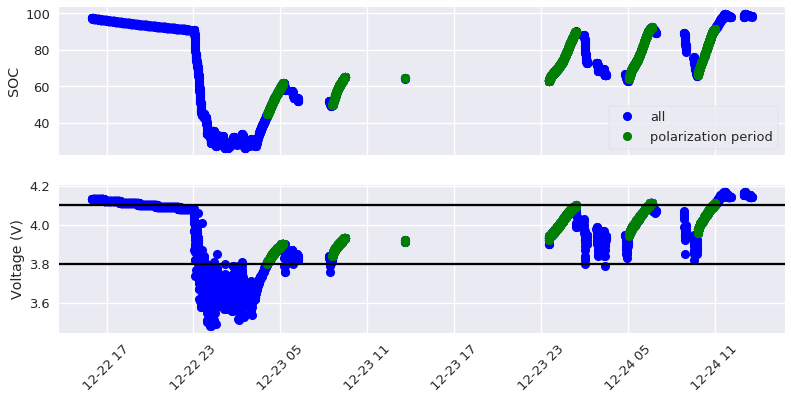

In [19]:
sns.set(rc={"figure.figsize": (13, 6)})
sns.set_context('talk')
f, (ax1, ax2) = plt.pyplot.subplots(2)

ax1.plot(ts['BMS_BATTSOC'], 'bo', label='all')
ax1.plot(db1['BMS_BATTSOC'], 'go', label='polarization period')

ax2.plot(ts['BMS_CELLVOLTMAX'], 'bo', label='all')
ax2.plot(db1['BMS_CELLVOLTMAX'], 'go', label='polarization period')
ax2.axhline(y=3.8, color='black')
ax2.axhline(y=4.1, color='black')


ax1.legend(loc=0, frameon=True)
ax1.set_ylabel('SOC')
ax2.set_ylabel('Voltage (V)')

plt.pyplot.setp(ax1.get_xticklabels(), visible=False)
plt.pyplot.setp(ax2.get_xticklabels(), rotation=45)
sns.despine()

# Get statistics

In [ ]:
from importlib import reload
reload(vehicle_stats)
reload(battery)

batt = battery.Battery()


end_date = '2017-12-24'
end_date = pd.to_datetime(end_date).date()
batt.find_polarization_periods(df_charge=veh.df_charge, end_date = end_date, offset_delta_voltage=1)

nperiods = len(batt.polarization_periods)
print("{} periods found".format(nperiods))

db1 = batt.polarization_periods[0]

polarization_stats = batt.get_battery_stats(which_stats=3)

In [ ]:
df_stats = pd.DataFrame(polarization_stats)
df_stats[['capacity_charged', 'energy_charged']]

In [ ]:
counts = df_stats['count_records']
counts

In [ ]:
df2 = db1.copy()
# We need to sort in ascencing order to check later if there are jumps and reset time
if df2['TDATE'][0] > df2['TDATE'][1]: # if ordered in descending order
    df2.sort_values(by='TDATE', inplace=True)
df2.head()

In [ ]:
from scipy import integrate, special
# For energy_throughput
c_ethr = 2.777777777777778e-06 # 10.0 seconds * (1 hour / 3600.0 seconds) * (1 kW / 1000 W)
ctte_et = (1. / 3600.) * (1. / 1000)
ctte_ah = (1. / 3600.)

v = df2['CCS_CHARGEVOLT']
i = df2['CCS_CHARGECUR']
t = df2['TDATE']
iabs = i.abs()  # Absolute value of current
p = iabs * v
p.sum() * c_ethr

#result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
#result
mindt = t.min()
seconds = t.apply(lambda x: (x - mindt).seconds )

seconds.head()

from scipy.interpolate import interp1d
# ET
tt = seconds.copy().values
pp = p.values * ctte_et
ff = interp1d(tt, pp, kind='cubic')

# Ah
tt = seconds.values
ii = iabs.values * ctte_ah
gg = interp1d(tt, ii, kind='cubic')

def et(ss):
    return ff(ss)

def ah(ss):
    return gg(ss)

result = integrate.quad(lambda x: et(x), tt.min(), tt.max())
print('ET ', result)

result = integrate.quad(lambda x: ah(x), tt.min(), tt.max())

print('Ah ', result)

In [ ]:
tt = seconds.copy().values
t_diff = np.diff(tt)
t_diff1 = t_diff.copy()
print(t_diff[t_diff > 60])

offset = 0
for i1, value in enumerate(t_diff):
    i2 = i1 + 1
    if value > 60:
        offset = offset - value + 10 # remove big jump (-value) and add 10s
    tt[i2] = tt[i2] + offset

t_diff = np.diff(tt)
#print(list(zip(t_diff1, t_diff)))
np.argwhere(t_diff > 60)
